In [108]:
# 1. Eliminating Dodgy Images

!pip install tensorflow opencv-python matplotlib




In [9]:
import tensorflow as tf
import os

#import openCV
import cv2
#import imghdr to check file extensions

import imghdr

from matplotlib import pyplot as plt




In [117]:
# Define image_exts and data_dir
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
data_dir = 'data'

In [119]:



# Eliminating Dodgy Images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)





In [10]:
import numpy as np
from matplotlib import pyplot as plt



In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')



Found 1026 files belonging to 2 classes.


In [95]:
data_iterator = data.as_numpy_iterator()

In [96]:
batch = data_iterator.next()

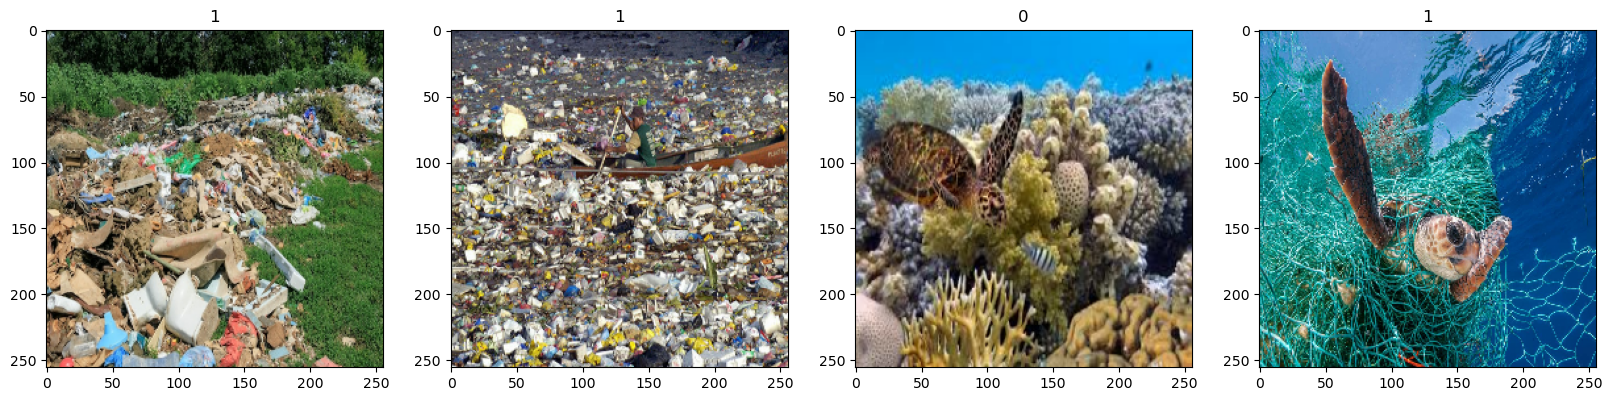

In [97]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [55]:
data = data.map(lambda x,y: (x/255, y))

In [56]:
data.as_numpy_iterator().next()

(array([[[[3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          [3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          [3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          ...,
          [0.00000000e+00, 1.10148594e-01, 2.12109372e-01],
          [0.00000000e+00, 1.06089152e-01, 2.08049938e-01],
          [0.00000000e+00, 9.81770828e-02, 2.00137869e-01]],
 
         [[3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          [3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          [3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          ...,
          [0.00000000e+00, 1.07743569e-01, 2.14091644e-01],
          [0.00000000e+00, 1.03684127e-01, 2.05898568e-01],
          [0.00000000e+00, 1.00497559e-01, 2.07183838e-01]],
 
         [[3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          [3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          [3.92156886e-03, 2.74509806e-02, 9.01960805e-02],
          ...,
          [0.00000000e+00, 1.06227025e-01, 2.1685

In [57]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [58]:
train_size



23

In [59]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [60]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:


model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)      

In [63]:
# 5. Train

logdir='logs'
#from keras.callbacks import EarlyStopping

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])



Epoch 1/30
23/23 [==============================] - 45s 2s/step - loss: 0.5905 - accuracy: 0.7405 - val_loss: 0.3712 - val_accuracy: 0.8438
Epoch 2/30
23/23 [==============================] - 42s 2s/step - loss: 0.4668 - accuracy: 0.8016 - val_loss: 0.3093 - val_accuracy: 0.8802
Epoch 3/30
23/23 [==============================] - 43s 2s/step - loss: 0.3942 - accuracy: 0.8329 - val_loss: 0.3569 - val_accuracy: 0.8698
Epoch 4/30
23/23 [==============================] - 42s 2s/step - loss: 0.3406 - accuracy: 0.8533 - val_loss: 0.2700 - val_accuracy: 0.8906
Epoch 5/30
23/23 [==============================] - 41s 2s/step - loss: 0.2521 - accuracy: 0.9008 - val_loss: 0.2468 - val_accuracy: 0.9010
Epoch 6/30
23/23 [==============================] - 40s 2s/step - loss: 0.2046 - accuracy: 0.9076 - val_loss: 0.2131 - val_accuracy: 0.9167
Epoch 7/30
23/23 [==============================] - 42s 2s/step - loss: 0.1706 - accuracy: 0.9280 - val_loss: 0.2299 - val_accuracy: 0.9167
Epoch 8/30
23/23 [==

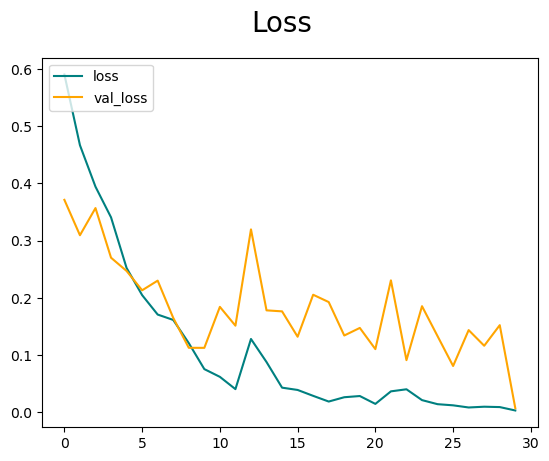

In [64]:
# 6. Plot Performance

hist.history['val_loss']

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()



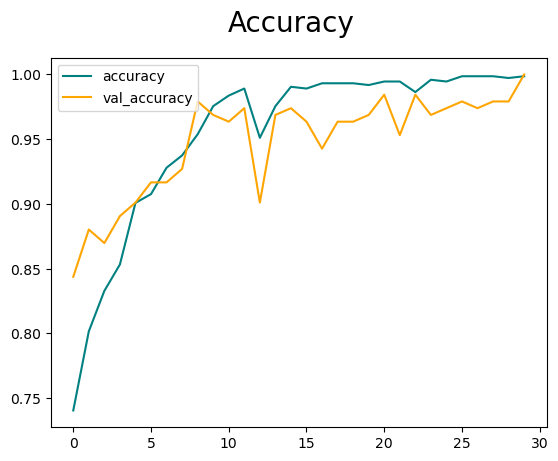

In [65]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()



In [67]:
!pip install scikit-learn

import sklearn
from sklearn import metrics

f1_score = metrics.f1_score(actual, predicted)
precision = metrics.precision_score(actual, predicted)
recall = metrics.recall_score(actual, predicted)

print("F1 score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)

F1 score: 0.8994413407821228
Precision: 0.8914728682170543
Recall: 0.9075535512965051


In [3]:
import cv2

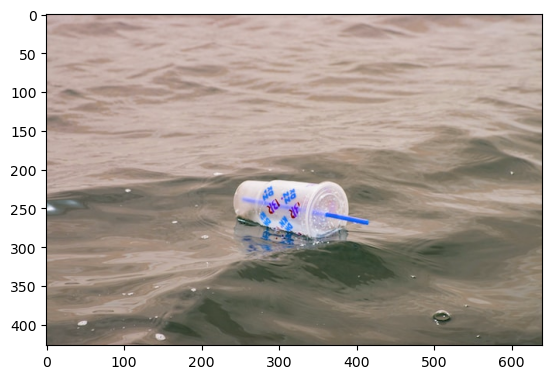

In [76]:
img = cv2.imread('test2.jpg')
plt.imshow(img)
plt.show()

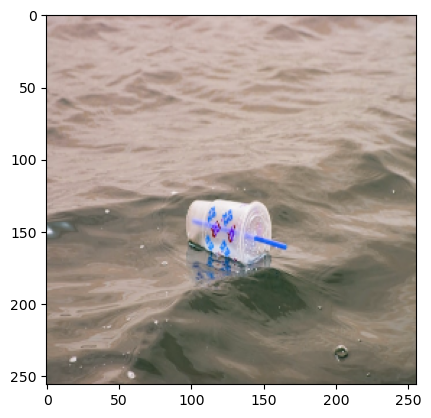

In [77]:
import tensorflow as tf
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [78]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [81]:
yhat

array([[0.50894195]], dtype=float32)

In [85]:
if yhat > 0.501: 
    print(f'Predicted class is Plastic')
else:
    print(f'Predicted class is Not Plastic')

Predicted class is Plastic
